In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
# from datetime import datetime

In [2]:
symb = input('Enter symbol : ') + '.ns'

Enter symbol : SIEMENS


In [3]:
days = 50

In [5]:
# if days<=20:
#     period = input('Enter period : \n Valid periods:1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max : ')
# elif days>22:
#     period = input('Enter period : \n Valid periods:3mo,3mo,6mo,1y,2y,5y,10y,ytd,max : ')
    

In [6]:
def calculate_sma(data, window):
    sma = []
    for i in range(len(data) - window + 1):
        window_data = data[i : i + window]
        sma_value = sum(window_data) / window
        sma.append(sma_value)
    padding = [0] * (window -1) 
    new_row = padding + sma
    return new_row


In [7]:
data = yf.download(symb,period='max')
data[str(days)+' SMA'] = calculate_sma(data['Close'], days)

[*********************100%***********************]  1 of 1 completed


In [8]:
days_to_show = int(input('For last how many days you want to plot graph ? : '))

For last how many days you want to plot graph ? : 200


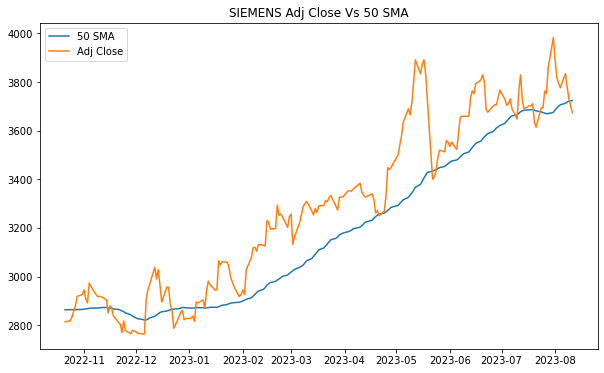

In [9]:
plt.figure(figsize=(10,6))
plt.plot(data[str(days)+' SMA'][-days_to_show:],label=str(days)+' SMA')
plt.plot(data['Close'][-days_to_show:],label='Adj Close')
plt.legend()
plt.title(symb.split('.')[0] + ' Adj Close Vs ' + str(days)+' SMA')
# plt.xticks(data.index[-days_to_show:],rotation=90)

plt.show()

In [10]:
l = []
smadf = pd.DataFrame()
flag = 0
row_index = 0
for i in data.index:
    if flag==0:
        if data['Close'][i] >= data[str(days)+' SMA'][i]:
#         if data[str(days)+' SMA'][i] >= data['Adj Close'][i]:
            l.append(i)
            
            smadf.loc[row_index,'flag'] = flag
            smadf.loc[row_index,'date'] = i
            smadf.loc[row_index,'Close'] = data['Close'][i]
            smadf.loc[row_index,'SMA'] = data[str(days)+' SMA'][i]
            row_index += 1
            
            flag=1
            
    elif flag==1:
        if data['Close'][i] <= data[str(days)+' SMA'][i]:
#         if data[str(days)+' SMA'][i] <= data['Adj Close'][i]:
            l.append(i)
            
            smadf.loc[row_index,'flag'] = flag
            smadf.loc[row_index,'date'] = i
            smadf.loc[row_index,'Close'] = data['Close'][i]
            smadf.loc[row_index,'SMA'] = data[str(days)+' SMA'][i]
            row_index += 1
            
            flag=0
        
# l = list(set(l))
# l.sort(reverse=False)
# l

smadf

,flag,date,Close,SMA
0,0.0,1999-01-04,24.600000,0.000000
1,1.0,1999-04-09,23.000000,23.484700
2,0.0,1999-05-11,25.049999,24.633300
3,1.0,1999-05-12,23.590000,24.695300
4,0.0,1999-05-19,26.030001,24.750600
...,...,...,...,...
375,1.0,2023-07-10,3647.449951,3664.862983
376,0.0,2023-07-11,3766.600098,3671.202983
377,1.0,2023-07-20,3635.399902,3684.680986
378,0.0,2023-07-24,3694.899902,3677.095981


In [11]:
# data.loc['2023-07-03' : '2023-08-04']

In [12]:
max(data.loc['2023-07-03' : '2023-08-04']['Close'])

3983.0

In [13]:
(max(data.loc['2023-07-03' : '2023-08-04']['Close']) -  data.loc['2023-07-03']['Close'] ) /data.loc['2023-07-03']['Close'] * 100

6.855894838984558

In [14]:
# smadf.loc[smadf['flag']==0]

In [15]:
# smadf.loc[smadf['flag']==1]

In [16]:
# indexDates = pd.DataFrame()
# start = smadf.loc[smadf['flag']==0,'date']#['date']
# end = smadf.loc[smadf['flag']==1,'date'] #['date']
# indexDates['start'] = start
# # index.reset_index()
# indexDates['end'] = end#.reset_index(drop=True)

In [17]:
# # for i in zip(start,end):
# #     print(i)
# print(len(indexDates))
# print(len(start))
# print(len(end))
# indexDates

In [18]:
# start,end

In [19]:
# indexDates = pd.DataFrame()
start = smadf.loc[smadf['flag']==0]['date']
end = smadf.loc[smadf['flag']==1]['date']
indexDates = pd.DataFrame({ 'start' : start.reset_index(drop=True), 'end' :  end.reset_index(drop=True)})

In [20]:
indexDates.tail(2)

,start,end
188,2023-07-11,2023-07-20
189,2023-07-24,2023-08-11


In [21]:
smadf.tail(2)

,flag,date,Close,SMA
378,0.0,2023-07-24,3694.899902,3677.095981
379,1.0,2023-08-11,3673.350098,3723.595996


In [22]:
data.loc['2023-06-16' : '2023-06-19']

,Open,High,Low,Close,Adj Close,Volume,50 SMA
Date,,,,,,,
2023-06-16,3746.649902,3799.0,3740.000000,3793.100098,3793.100098,306264,3547.580991
2023-06-19,3802.000000,3838.0,3783.350098,3807.699951,3807.699951,228208,3556.711992


In [23]:
type(data.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
type(indexDates['start'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
data.loc[indexDates['start'][0] : indexDates['end'][0]].head(2)

,Open,High,Low,Close,Adj Close,Volume,50 SMA
Date,,,,,,,
1999-01-04,23.0,24.605,22.830000,24.600,19.749378,2877000,0.0
1999-01-05,24.4,25.900,23.700001,25.105,20.154800,2263500,0.0


In [26]:
finaldf = indexDates.copy()

In [27]:
finaldf.tail(2)

,start,end
188,2023-07-11,2023-07-20
189,2023-07-24,2023-08-11


In [28]:
for i in range(len(indexDates)):
    per = (max(data.loc[indexDates['start'][i] : indexDates['end'][i],'Close']) - data.loc[indexDates['start'][i],'Close'] )/ data.loc[indexDates['start'][i],'Close']*100
    finaldf.loc[i,'max price between the start and end dates'] = max(data.loc[indexDates['start'][i] : indexDates['end'][i],'Close'])
    finaldf.loc[i,'percentage'] = per
    finaldf.loc[i,'max price date'] = data.loc[data['Close']==max(data.loc[indexDates['start'][i] : indexDates['end'][i],'Close'])].index[0]

In [29]:
finaldf

,start,end,max price between the start and end dates,percentage,max price date
0,1999-01-04,1999-04-09,31.754999,29.085360,1999-03-18
1,1999-05-11,1999-05-12,25.049999,0.000000,1999-05-11
2,1999-05-19,1999-05-21,26.030001,0.000000,1999-05-19
3,1999-06-17,1999-06-18,22.455000,0.000000,1999-06-17
4,1999-06-21,1999-06-23,22.959999,0.000000,1999-06-21
...,...,...,...,...,...
185,2023-01-11,2023-04-21,3383.600098,15.049306,2023-04-10
186,2023-04-24,2023-05-22,3891.199951,19.047905,2023-05-17
187,2023-05-25,2023-07-10,3829.399902,9.811453,2023-06-20
188,2023-07-11,2023-07-20,3828.850098,1.652684,2023-07-12


In [30]:
fc = finaldf.copy()

In [32]:
fc.loc[fc['percentage']!=0]

,start,end,max price between the start and end dates,percentage,max price date
0,1999-01-04,1999-04-09,31.754999,29.085360,1999-03-18
6,1999-07-05,1999-10-04,38.935001,64.386752,1999-08-31
8,1999-10-07,1999-11-01,41.735001,16.188760,1999-10-25
9,1999-11-03,2000-01-11,54.654999,44.132388,2000-01-04
13,2000-05-30,2000-06-01,29.955000,2.148335,2000-05-31
...,...,...,...,...,...
185,2023-01-11,2023-04-21,3383.600098,15.049306,2023-04-10
186,2023-04-24,2023-05-22,3891.199951,19.047905,2023-05-17
187,2023-05-25,2023-07-10,3829.399902,9.811453,2023-06-20
188,2023-07-11,2023-07-20,3828.850098,1.652684,2023-07-12


In [33]:
fc.loc[fc['percentage']!=0]['percentage'].describe()

count    129.000000
mean      15.406680
std       27.155467
min        0.003684
25%        1.876472
50%        5.035903
75%       16.267086
max      188.604175
Name: percentage, dtype: float64

In [34]:
fc.loc[fc['percentage']==fc['percentage'].max()]

,start,end,max price between the start and end dates,percentage,max price date
44,2003-07-30,2004-01-28,107.0,188.604175,2003-12-31


In [41]:
per = list(fc.loc[fc['percentage']!=0]['percentage'])
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,float('inf')]

categories = pd.cut(per, bins=bins, labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50',
                                            '50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100','100 +'])

count_by_category = categories.value_counts().sort_index()

print(count_by_category)


0-5       64
5-10      17
10-15     11
15-20      9
20-25      2
25-30      6
30-35      5
35-40      2
40-45      2
45-50      2
50-55      1
55-60      0
60-65      5
65-70      0
70-75      0
75-80      0
80-85      0
85-90      0
90-95      0
95-100     0
100 +      3
dtype: int64


In [42]:
fc.loc[fc['percentage']>60]

,start,end,max price between the start and end dates,percentage,max price date
6,1999-07-05,1999-10-04,38.935001,64.386752,1999-08-31
37,2002-01-18,2002-05-28,31.510000,60.519621,1999-08-10
44,2003-07-30,2004-01-28,107.000000,188.604175,2003-12-31
51,2005-11-17,2006-05-18,620.515015,152.031847,2006-04-05
61,2007-09-18,2008-01-21,1037.349976,61.587292,2007-11-19
65,2009-03-18,2009-07-08,511.899994,129.551567,2009-06-10
112,2014-12-30,2015-04-17,1471.949951,64.170198,2015-03-12
157,2020-09-01,2021-03-25,1941.099976,64.814262,2021-03-04


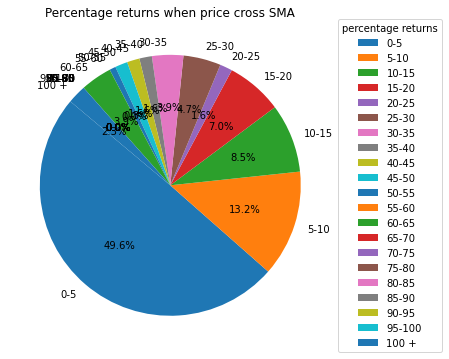

In [43]:
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(count_by_category, labels=count_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage returns when price cross SMA")

plt.legend(title='percentage returns', labels=count_by_category.index, bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

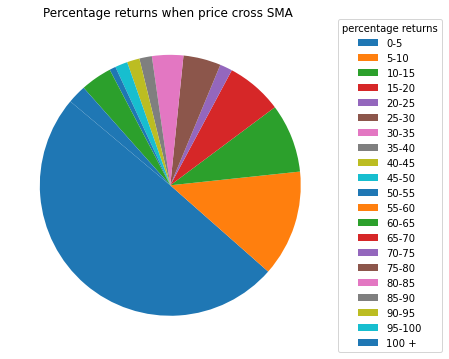

In [44]:
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(count_by_category,  startangle=140)
plt.title("Percentage returns when price cross SMA ")

plt.legend(title='percentage returns', labels=count_by_category.index, bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()